In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [5]:
exec(open("../../header.py").read())

# Import data

In [6]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [7]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Age plot

In [8]:
exec(open("../../header.py").read())

In [9]:
ice = ICE("binary", trace = False)

In [10]:
ice.fit_single_feature(X, rf, "Age")

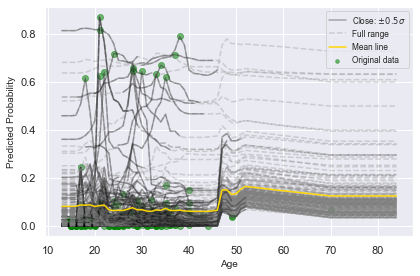

In [31]:
ice.ice_plot_single_feature('Age', plot_num = 200, mode = "ice", 
    save_path = results_root('cancer-dataset-production/age-ice.pdf'))

In [12]:
ice.ice_fis['Age']

{'Feature': 'Age',
 'ICE FI': 0.07285614176465217,
 'ICE In-Dist FI': 0.07667867264805033,
 'ICE Heterogeneity': 0.012726696324688556,
 'ICE Non-linearity': 0.02102656942628654}

# Fit all

In [11]:
ice.fit(X, rf)

In [13]:
ice.ice_fis['STDs:Hepatitis B']

{'Feature': 'STDs:Hepatitis B',
 'ICE FI': 0.1331617101243363,
 'ICE In-Dist FI': 0.1996551890357618,
 'ICE Heterogeneity': 5.235678860298014,
 'ICE Non-linearity': 3.3801479859355674}

# Hepatitis-B ICE Plot

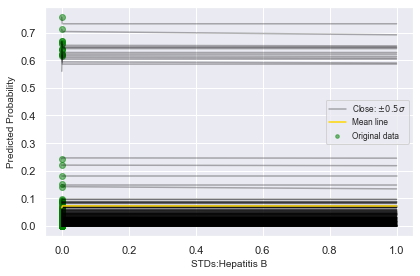

In [34]:
ice.ice_plot_single_feature('STDs:Hepatitis B', plot_num = 200, mode = "ice", 
    save_path = results_root('cancer-dataset-production/hepatitis-ice.pdf'))

# Full ICE plot

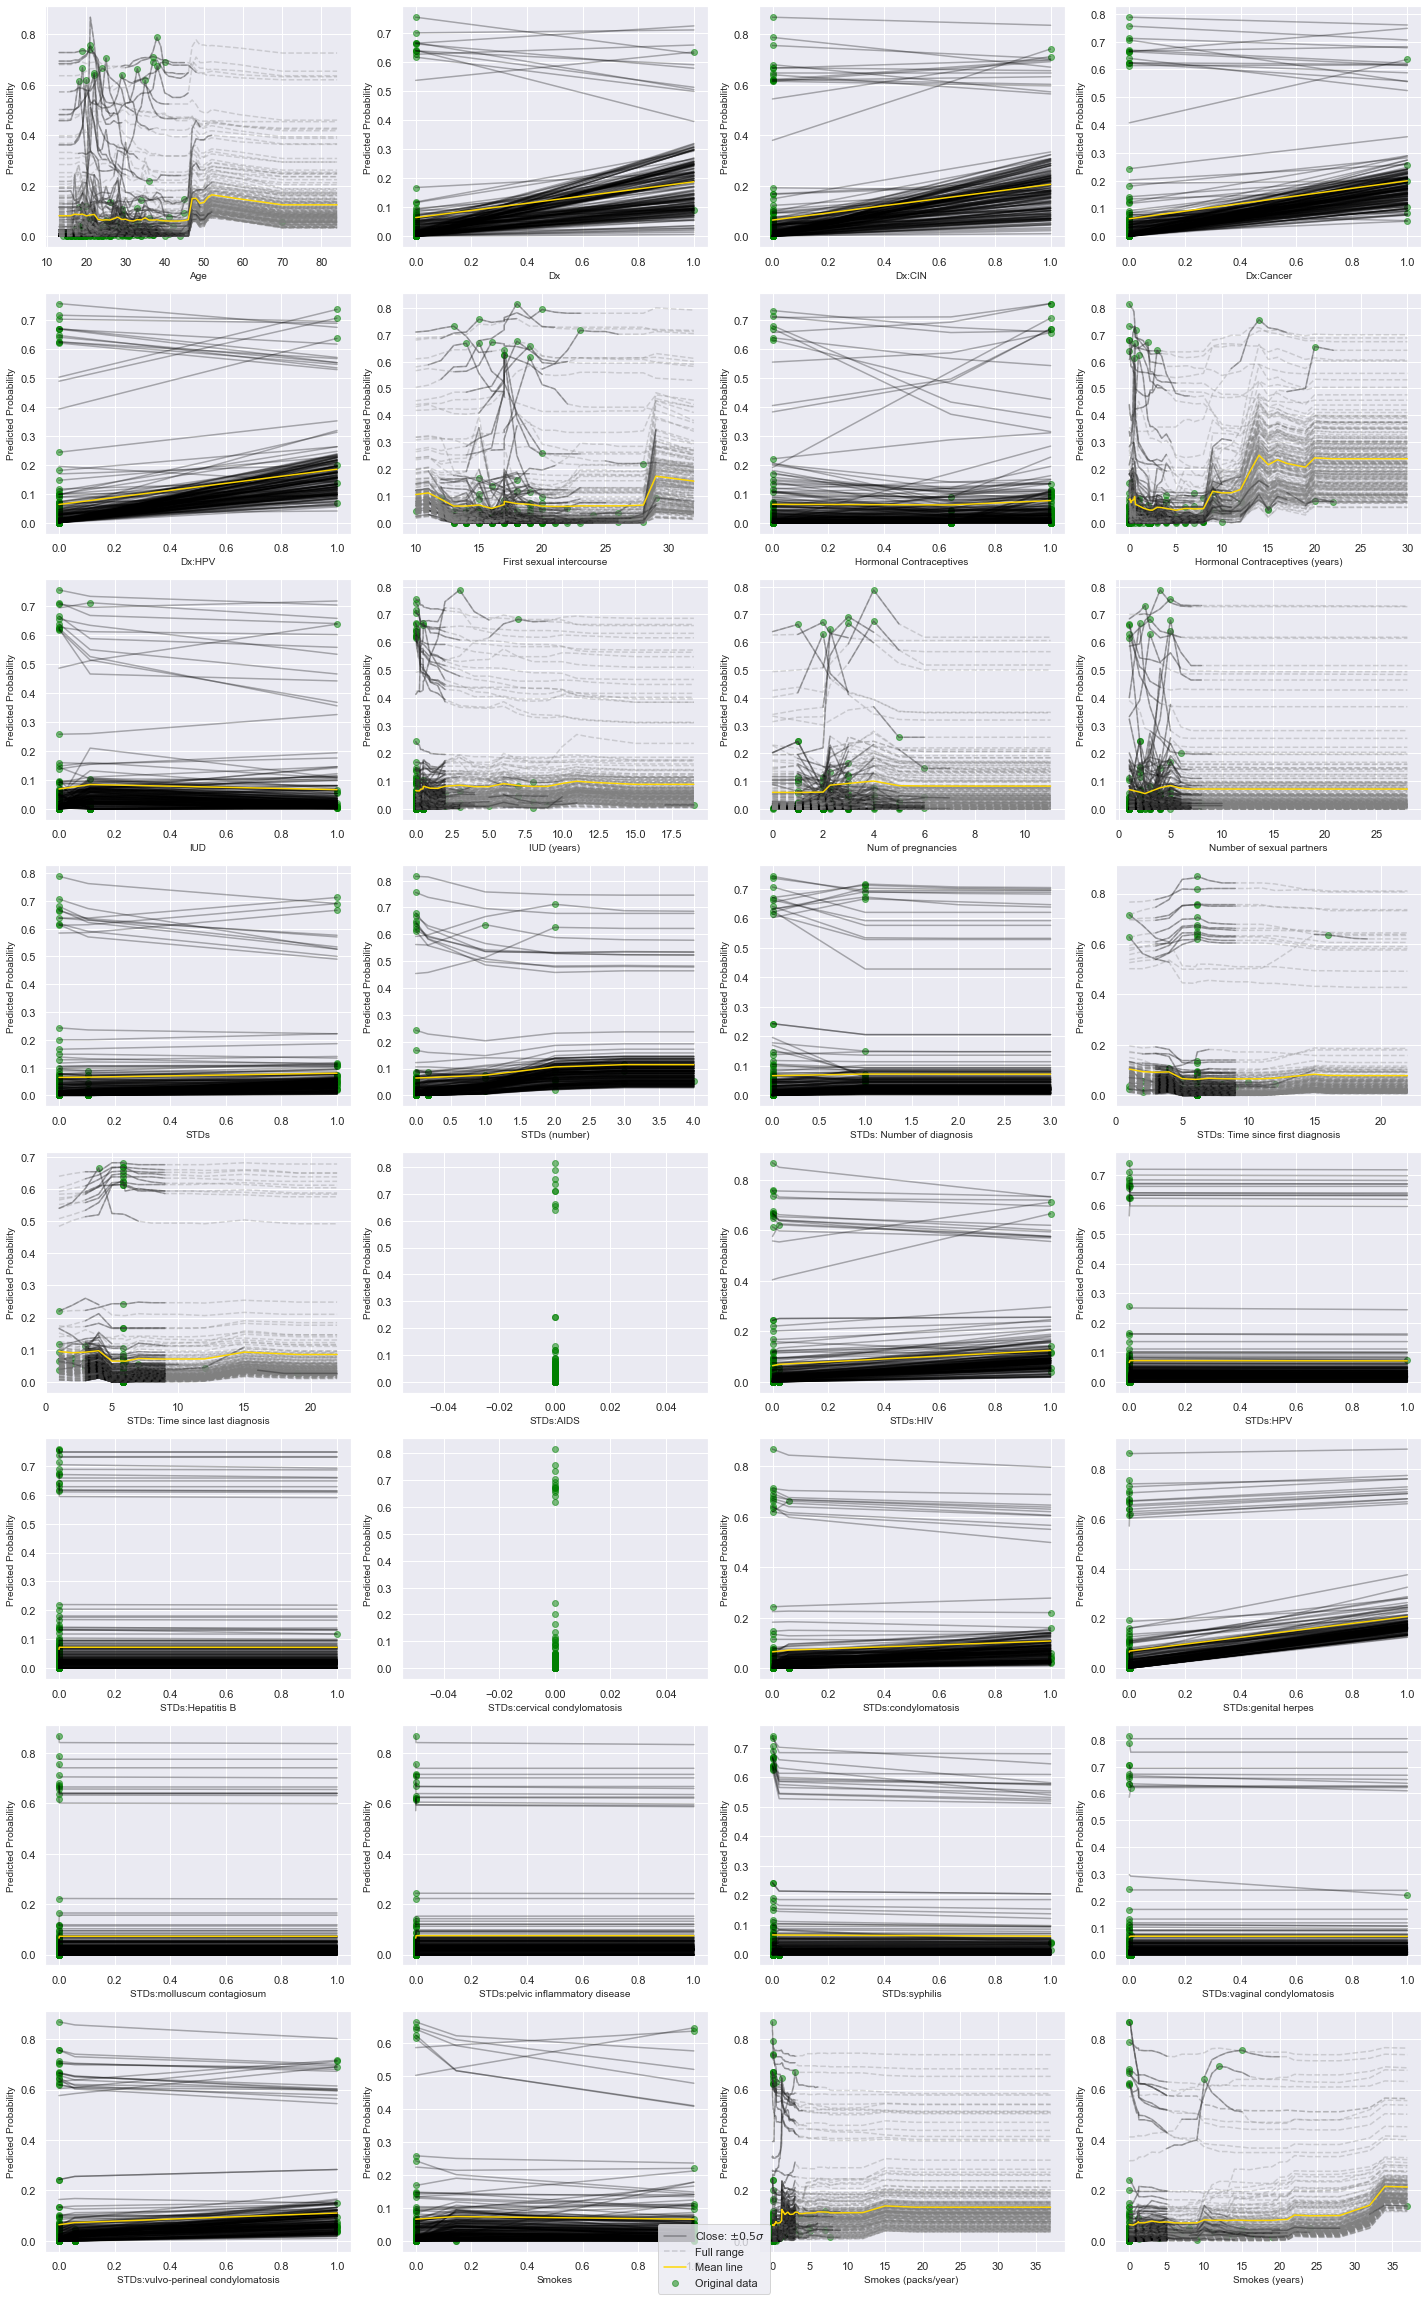

In [35]:
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-ice-plots.pdf'),
             mode = 'ice', ncols = 4)
# ice.ice_plot(mode = "ice")

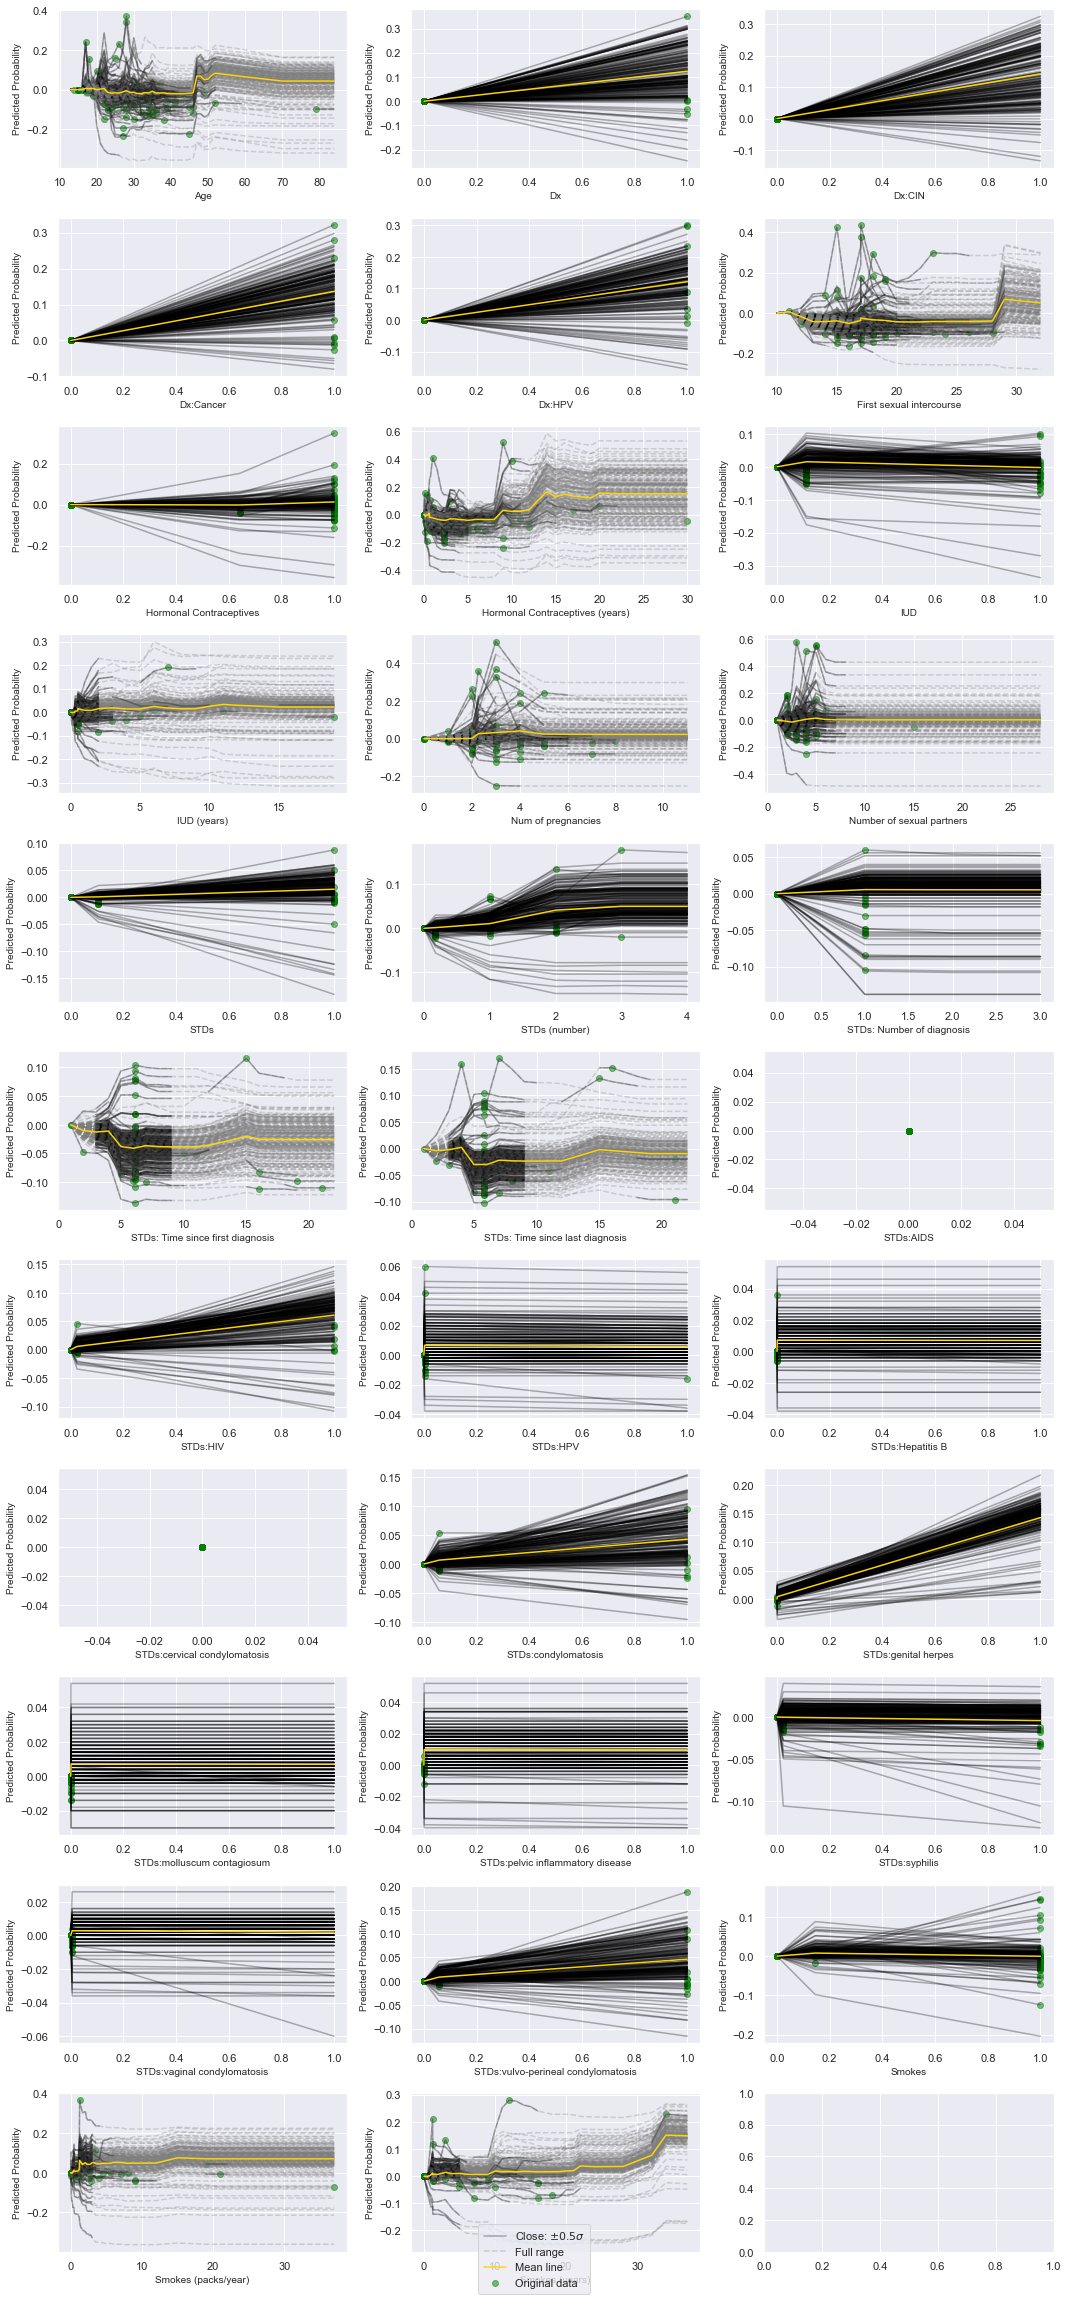

In [36]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-c-ice-plots.pdf'),
             mode = 'c-ice')

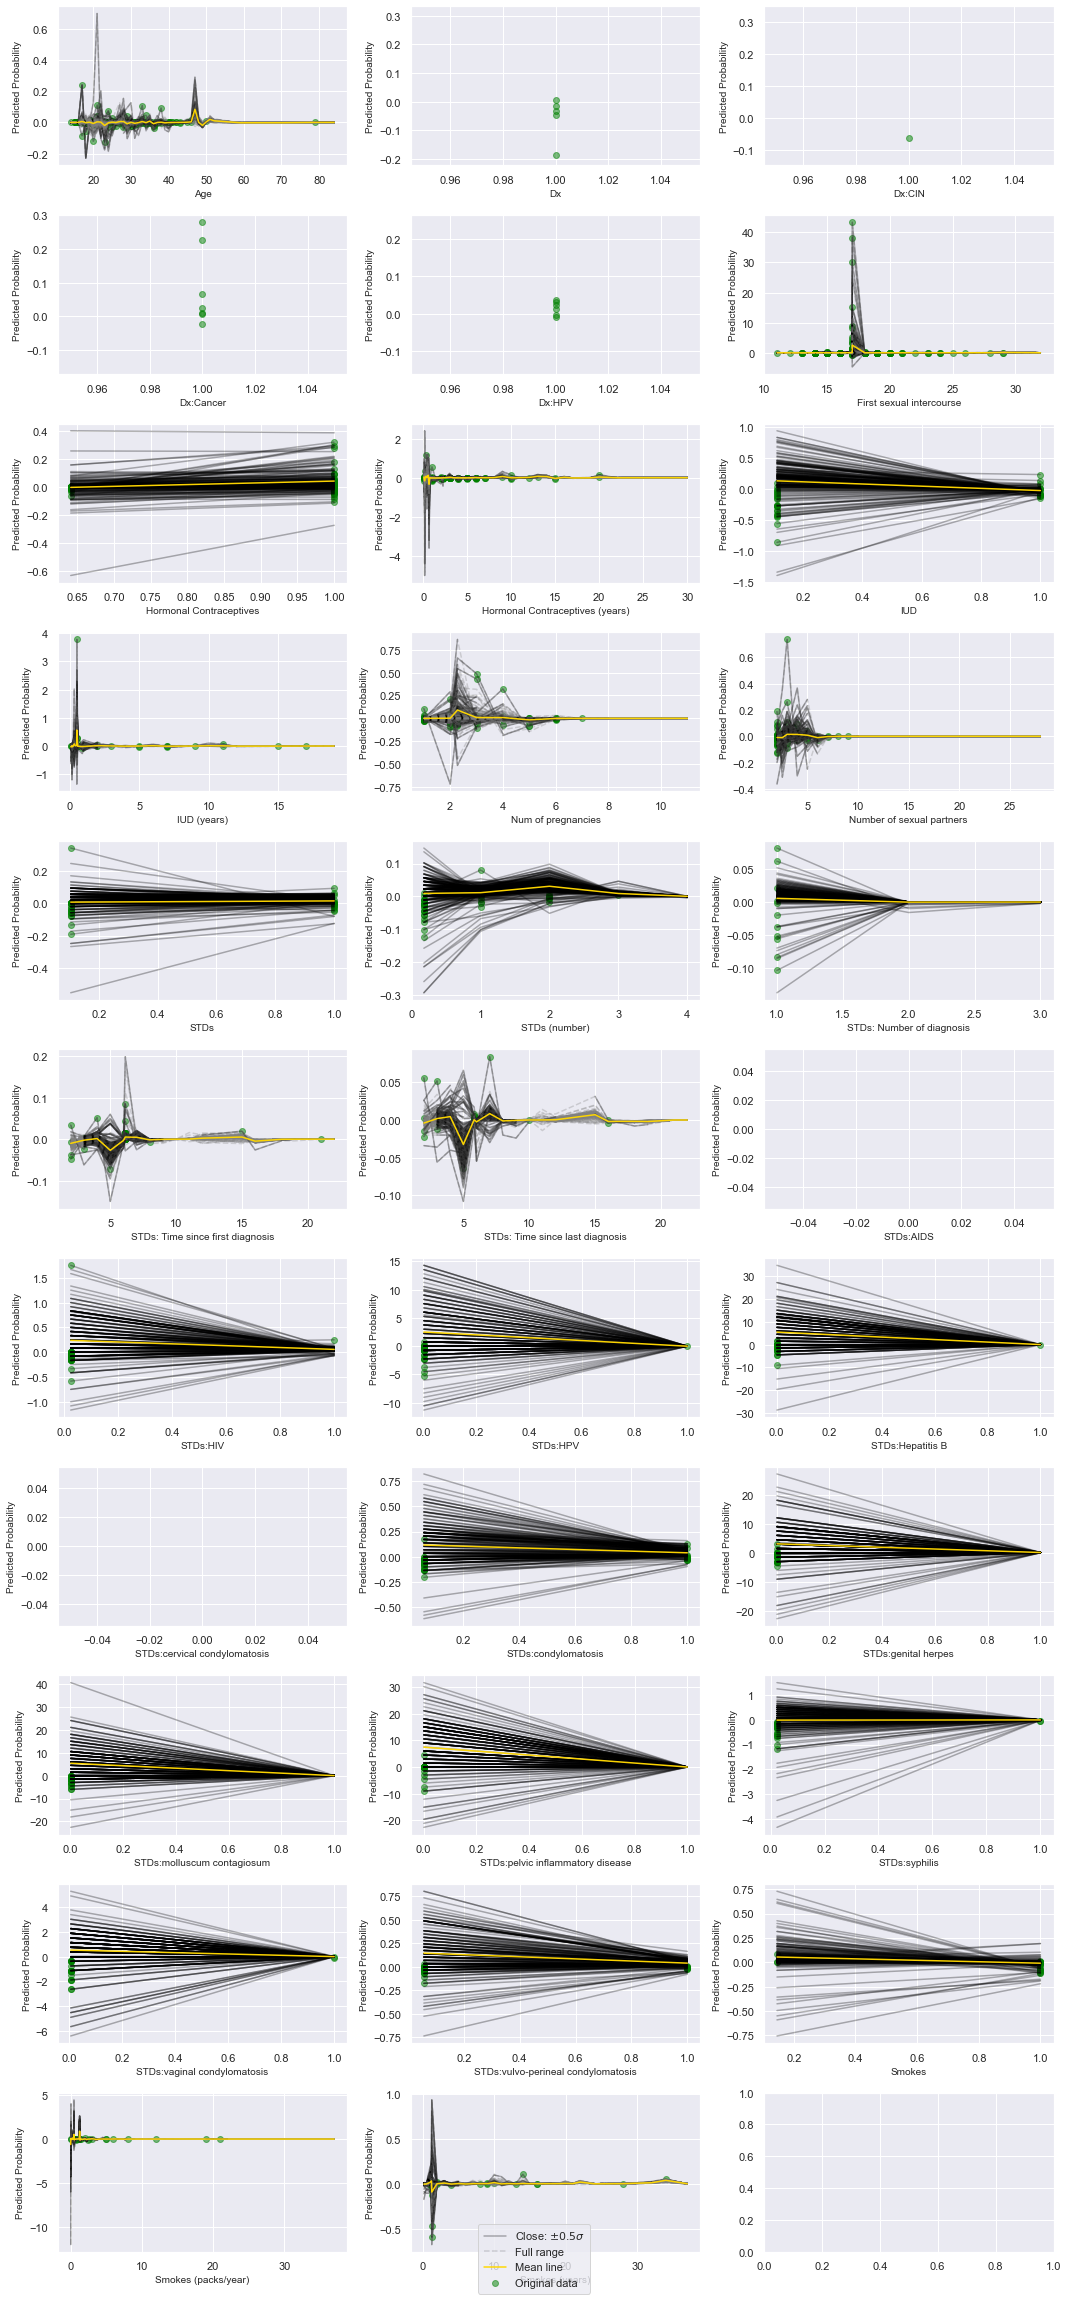

In [37]:
# ice.ice_plot(results_root("ice-plot-from-class/all_plots.pdf"))
ice.ice_plot(save_path = results_root('cancer-dataset-production/all-d-ice-plots.pdf'),
             mode = 'd-ice')

# Feature impact histogram

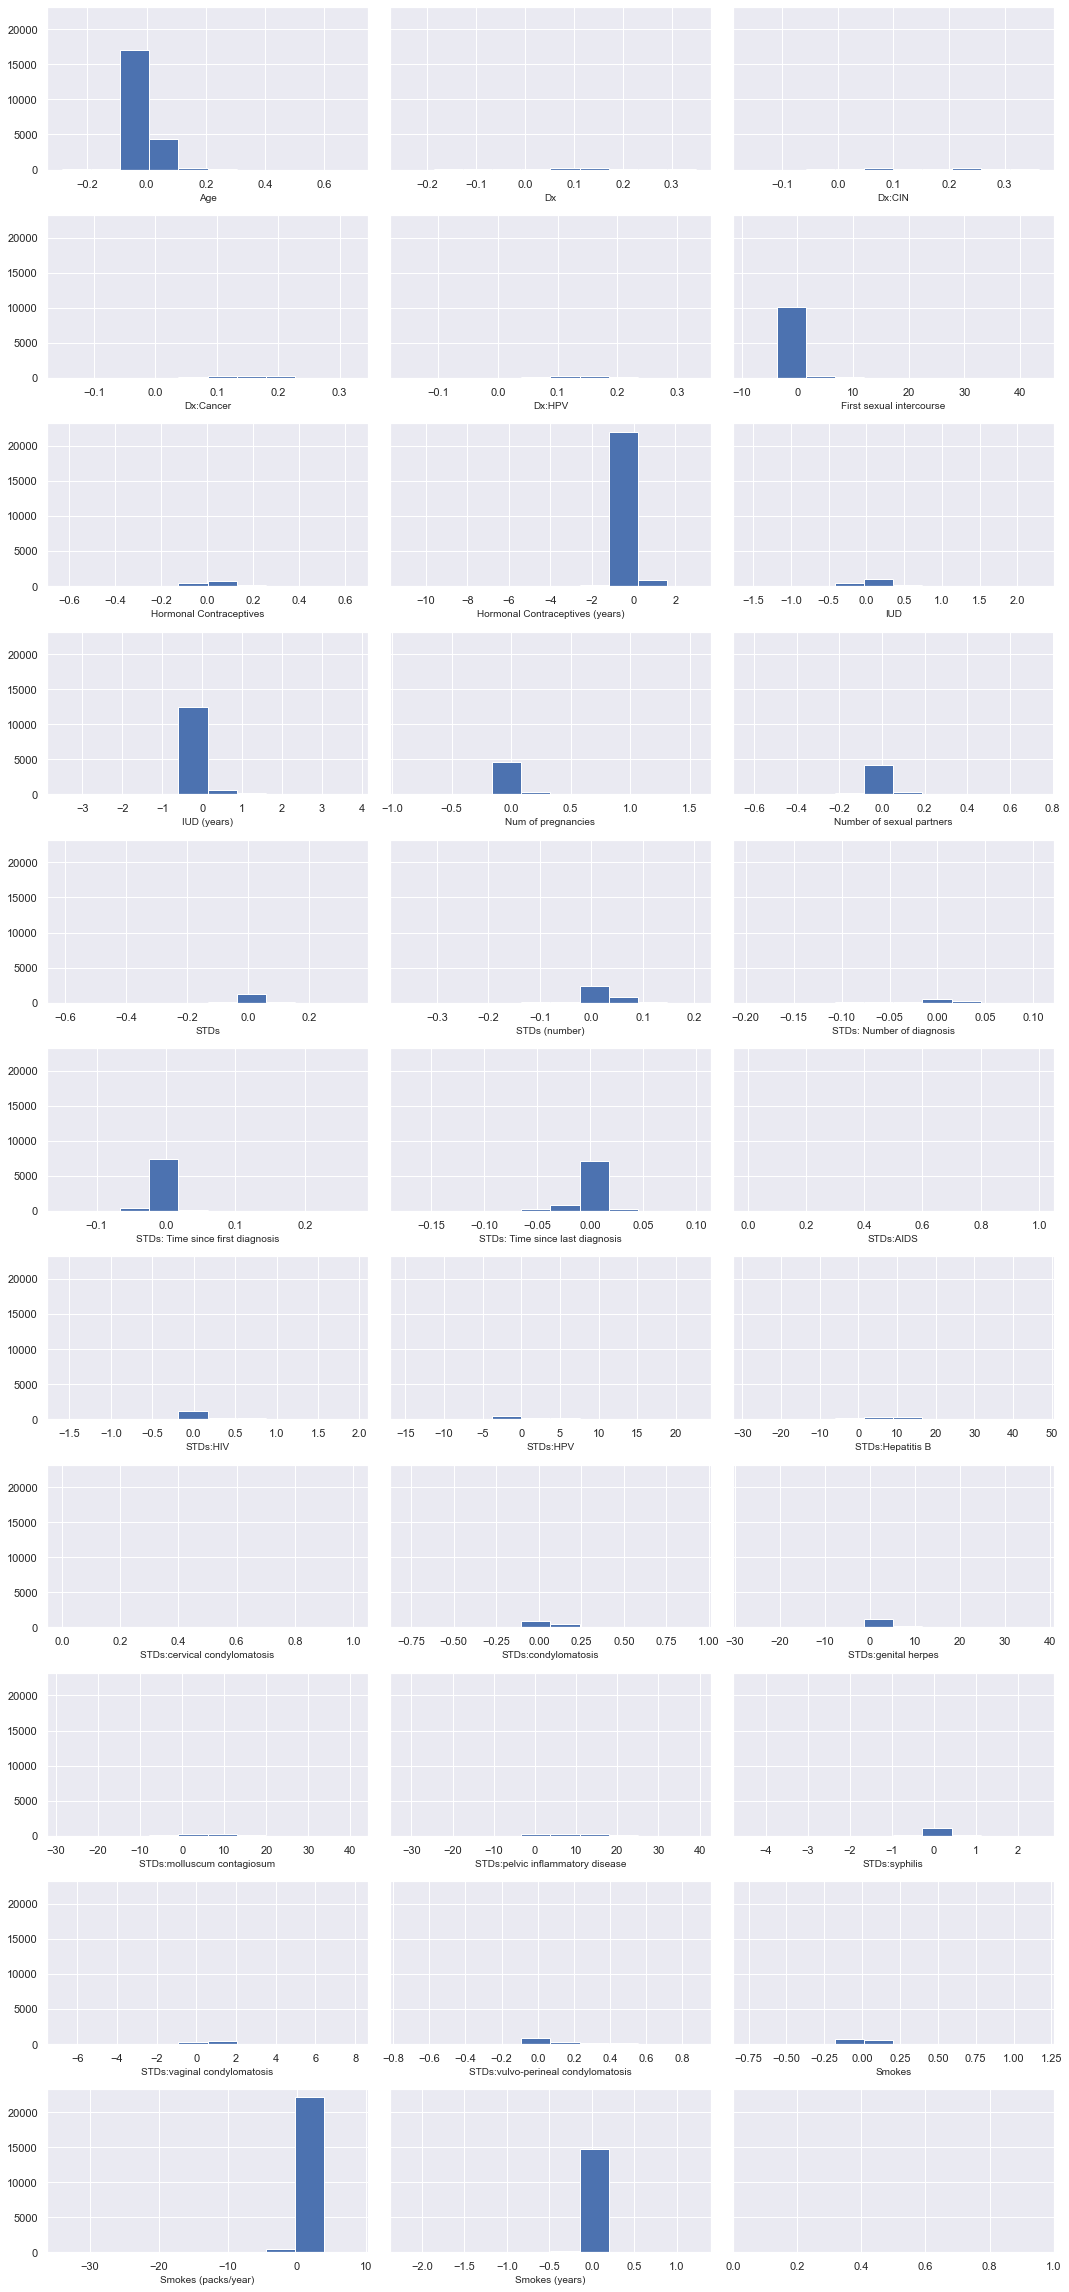

In [39]:
ice.feature_hist(results_root("cancer-dataset-production/fi_histograms.pdf"))

# Feature impact vs random forest feature importance

In [40]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF Feature Importance':rf.feature_importances_*100})\
    .round(3)

In [41]:
a = ice.feature_table()\
    .merge(b, how = "inner", on = "Feature")\
    .assign(norm_fi = lambda x:x['Feature Impact']/x['Feature Impact'].sum() * 100,
            norm_fi_in_dist = lambda x:x['In-Dist Feature Impact']/x['In-Dist Feature Impact'].sum() * 100)\
    .rename({'norm_fi':'Normalized Feature Impact',
             'norm_fi_in_dist':'Normalized In-Dist Feature Impact'}, axis = 1)\
    .assign(Difference = lambda x:x['Normalized Feature Impact'] - x['RF Feature Importance'],
            in_dist_difference = lambda x:x['Normalized In-Dist Feature Impact'] - x['RF Feature Importance'])\
    .rename({'in_dist_difference':'In-Dist Difference'}, axis = 1)\
    .round(2)\
    .sort_values('Difference', ascending = False)\
    .loc[:,['Feature', 'Feature Impact', 'In-Dist Feature Impact', 'Normalized Feature Impact', 'RF Feature Importance', 'Difference']]

In [42]:
a.sort_values('Difference', ascending = False)

Feature  Feature Impact  \
2             First sexual intercourse            0.42   
18    STDs:pelvic inflammatory disease            0.17   
20          STDs:molluscum contagiosum            0.13   
23                    STDs:Hepatitis B            0.13   
24                            STDs:HPV            0.10   
6                  Smokes (packs/year)            0.14   
19                 STDs:genital herpes            0.09   
15         STDs:vaginal condylomatosis            0.04   
17                       STDs:syphilis            0.03   
16  STDs:vulvo-perineal condylomatosis            0.03   
13                 STDs:condylomatosis            0.02   
22                            STDs:HIV            0.03   
9                                  IUD            0.05   
11                                STDs            0.01   
14        STDs:cervical condylomatosis            0.00   
21                           STDs:AIDS            0.00   
10                         IUD (years)            0.08   
4                               Smokes            0.02   
29                              Dx:CIN            0.01   
25           STDs: Number of diagnosis            0.00   
12                       STDs (number)            0.01   
28                           Dx:Cancer            0.02   
31                                  Dx            0.02   
30                              Dx:HPV            0.02   
27     STDs: Time since last diagnosis            0.01   
26    STDs: Time since first diagnosis            0.01   
7              Hormonal Contraceptives            0.02   
5                       Smokes (years)            0.05   
8      Hormonal Contraceptives (years)            0.22   
3                   Num of pregnancies            0.03   
1            Number of sexual partners            0.02   
0                                  Age            0.07   

    In-Dist Feature Impact  Normalized Feature Impact  RF Feature Importance  \
2                     0.54                      20.86                  12.39   
18                    0.17                       8.49                   0.17   
20                    0.13                       6.46                   0.14   
23                    0.13                       6.47                   0.16   
24                    0.09                       4.77                   0.19   
6                     0.18                       7.20                   3.50   
19                    0.09                       4.44                   0.91   
15                    0.04                       2.16                   0.26   
17                    0.03                       1.72                   0.34   
16                    0.02                       1.30                   0.62   
13                    0.02                       1.23                   0.60   
22                    0.02                       1.47                   1.23   
9                     0.03                       2.26                   2.11   
11                    0.01                       0.56                   0.49   
14                    0.00                       0.00                   0.00   
21                    0.00                       0.00                   0.00   
10                    0.11                       3.79                   3.85   
4                     0.01                       1.01                   1.41   
29                    0.00                       0.75                   1.23   
25                    0.00                       0.10                   0.61   
12                    0.01                       0.56                   1.10   
28                    0.00                       1.03                   1.68   
31                    0.00                       1.11                   1.77   
30                    0.00                       0.92                   1.69   
27                    0.01                       0.39                   1.86   
26                    0.01          

In [ ]:
print(a.to_latex(index = False,
                 column_format = 'p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}',
                 label = "fig:cancer-fi-table",
                 caption = "Feature impact table for all features in cervical cancer dataset.",
                ))

In [ ]:
print(a\
      .assign(abs_diff = lambda x:np.abs(x['Difference']))\
      .sort_values('abs_diff', ascending = False)\
      .drop('abs_diff', axis = 1)\
      .head(5)\
      .to_latex(index = False,
                 column_format = 'p{5cm}c{1cm}c{1cm}c{1cm}c{1cm}c{1cm}',
                 label = "fig:cancer-fi-table-top-5",
                 caption = "Feature impact table for features in cervical cancer dataset with largest difference between feature importance and impact.",
                ))